<a href="https://colab.research.google.com/github/BYRic-F/Data_practice/blob/main/web_scraping_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Générer automatiquement les URL des 5 premières pages

def get_url(base_url, nombre_de_pages):
  liste_url = []
  for i in range(1, nombre_de_pages) :
    url = f"{base_url}{i}"
    liste_url.append(url)
  return liste_url


get_url('https://www.chucknorrisfacts.fr/facts/top/',6)

['https://www.chucknorrisfacts.fr/facts/top/1',
 'https://www.chucknorrisfacts.fr/facts/top/2',
 'https://www.chucknorrisfacts.fr/facts/top/3',
 'https://www.chucknorrisfacts.fr/facts/top/4',
 'https://www.chucknorrisfacts.fr/facts/top/5']

In [4]:
# Utilise BeautifulSoup pour scraper les facts et les notes des 5 premières pages, grâce aux URL que tu as générées. Le résultat doit être dans un dictionnaire.

def scraper_page(base_url, nombre_de_pages) :
  urls = get_url(base_url, nombre_de_pages)
  resultat = {}
  for url in urls :
    response = requests.get(url)


    if response.status_code == 200 :
      soup = BeautifulSoup(response.text, 'html.parser')
      facts = soup.find_all('p', {'class' : 'card-text'})
      rates = soup.find_all('span')
      for fact, rate in zip(facts, rates) :
        try :
          fact =fact.text
          rate = rate.text.replace('(', '').replace('/10)', '')
          resultat[fact] = rate
        except :
          pass
  return resultat


dico = scraper_page('https://www.chucknorrisfacts.fr/facts/top/', 6)
dico

{"Chuck Norris peut manger plus de donuts qu'Homer.": '8.88',
 "Les ennemis des amis de Chuck Norris sont ses amis. Et oui! Les ennemis de Chuck Norris n'existent plus.": '8.83',
 "Un jour Chuck Norris a eu un zero en latin, depuis c'est une langue morte.": '8.42',
 "L'avenir se demande parfois ce que Chuck Norris lui réserve.": '8.42',
 'Chuck Norris ne sait pas à quoi ressemble Nicolas Sarkozy,  en effet Chuck Norris ne baisse jamais les yeux.': '8.40',
 "Chuck Norris n'a pas de père. On ne nique pas la mère de Chuck Norris.": '8.34',
 '': '8.34',
 "Chuck Norris ne ment pas, c'est la vérité qui se trompe.": '8.33',
 'Les samouraïs tuent des mouches avec leurs sabres...Chuck Norris, lui, tue des samouraïs avec des mouches': '8.32',
 "Les ennemis de Chuck Norris lui disent souvent d'aller au diable. Le Diable aimerait bien qu'ils arrêtent.": '8.30',
 "Cherchez l'intrus : Un rouge-gorge, un pigeon, un moineau et Chuck Norris.Réponse : Un rouge-gorge, un pigeon et un moineau.": '8.30',
 

In [12]:
# Crée un DataFrame contenant ces données, il doit donc posséder 2 colonnes et 100 lignes.

df = pd.DataFrame({'Joke' : dico.keys(),
                   'Rating' : dico.values()})
df

,Joke,Rating
0,Chuck Norris peut manger plus de donuts qu'Homer.,8.88
1,Les ennemis des amis de Chuck Norris sont ses ...,8.83
2,"Un jour Chuck Norris a eu un zero en latin, de...",8.42
3,L'avenir se demande parfois ce que Chuck Norri...,8.42
4,Chuck Norris ne sait pas à quoi ressemble Nico...,8.40
...,...,...
95,"Un jour, Chuck Norris a pété un câble. Ainsi e...",8.21
96,"Aux Jeux Olympiques, Chuck Norris a été disqua...",8.21
97,"Chuck Norris devait jouer dans ""Titanic"" mais ...",8.21
98,Quand on meurt on ne voit pas de lumiere blanc...,8.21


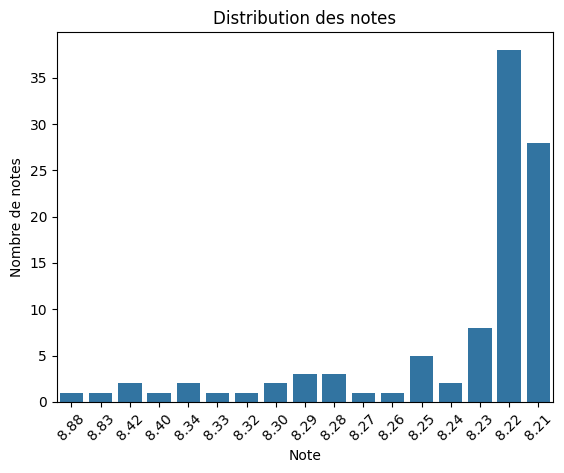

In [28]:
# Crée une visualisation de la distribution des notes.
sns.countplot(x=df['Rating'])
plt.xticks(rotation = 45)
plt.title("Distribution des notes")
plt.xlabel("Note")
plt.ylabel("Nombre de notes")
plt.show()